In [ ]:
# Hypothesis Testing
# 6: Over time, the share of female authors grew

In [1]:
# >>> Preparation
import pandas

In [2]:
print("Importing publications... ")
cols = [
    'key', 
    'pub_cat',
    'pub_type',
    'title',
    'year',
    'authors',
    'n_authors',
    'n_males',
    'n_females',
    'n_unknown',
    'ratio',
    'n_contribs_females',
    'n_contribs_males',
    'n_contribs_unknown',
]

publs = pandas.read_csv("data/publications_cor3.csv", usecols=cols)

# Setting index & accessing cells: https://pythonhow.com/accessing-dataframe-columns-rows-and-cells/
publs = publs.set_index("key", drop = False)
print("Publications imported. They look like this: {}".format(publs[:5]))

Importing publications... 


C:\Program_Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Publications imported. They look like this:                                                                  key  \
key                                                                    
books/acm/0082477                                  books/acm/0082477   
books/acm/Kim95                                      books/acm/Kim95   
books/acm/kim95/AnnevelinkACFHK95  books/acm/kim95/AnnevelinkACFHK95   
books/acm/kim95/Blakeley95                books/acm/kim95/Blakeley95   
books/acm/kim95/BreitbartGS95          books/acm/kim95/BreitbartGS95   

                                        pub_cat pub_type  \
key                                                        
books/acm/0082477                          book      NaN   
books/acm/Kim95                            book      NaN   
books/acm/kim95/AnnevelinkACFHK95  incollection      NaN   
books/acm/kim95/Blakeley95         incollection      NaN   
books/acm/kim95/BreitbartGS95      incollection      NaN   

                              

In [3]:
# Correlation matrix for relevant years only
# Creation

# Create dataset of publications by year
publs_by_year_group = publs.groupby("year")

# How many publications by year?
publs_sum_by_year = publs_by_year_group.count()

In [4]:
# Find out the minimum and maximum valid year:
min_year = publs_sum_by_year[publs_sum_by_year['key'] > 1000].index.values.min() # 1966
max_year = 2018 # To Adjust: We only have 4 months of 2019 with the dataset of April 2019

In [5]:
publs_lim = publs[(publs['year'] >= min_year) & (publs['year'] <= max_year)]

In [6]:
publs_lim_grouped = publs_lim.groupby("year").sum()
publs_lim_grouped["year"] = publs_lim_grouped.index.values.tolist()

In [14]:
publs_lim_grouped["fem_share"] = publs_lim_grouped["n_females"] / (publs_lim_grouped["n_females"] + publs_lim_grouped["n_males"])

In [15]:
publs_lim_grouped["fem_share"]

year
1966    0.013158
1967    0.011997
1968    0.011284
1969    0.015160
1970    0.007966
1971    0.014010
1972    0.012362
1973    0.025690
1974    0.018846
1975    0.023283
1976    0.028426
1977    0.024679
1978    0.027711
1979    0.033617
1980    0.030000
1981    0.031003
1982    0.035690
1983    0.034718
1984    0.036104
1985    0.039753
1986    0.042356
1987    0.040356
1988    0.042315
1989    0.047619
1990    0.047618
1991    0.045668
1992    0.049613
1993    0.052270
1994    0.052035
1995    0.052978
1996    0.056539
1997    0.059540
1998    0.061784
1999    0.064160
2000    0.064915
2001    0.067825
2002    0.070746
2003    0.070752
2004    0.070207
2005    0.070758
2006    0.072255
2007    0.073563
2008    0.075232
2009    0.077737
2010    0.078239
2011    0.080014
2012    0.081133
2013    0.083280
2014    0.085533
2015    0.085909
2016    0.087466
2017    0.086906
2018    0.084916
Name: fem_share, dtype: float64

In [16]:
from scipy import stats
print("Calculating Spearman's Correlation Coefficient...")
publs_lim_cor = stats.spearmanr(publs_lim_grouped["year"], publs_lim_grouped["fem_share"])
print("Done!")
print(publs_lim_cor)
'''No correlation found.'''
# p value can not be trusted since 53 observations < 500: https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.spearmanr.html

Calculating Spearman's Correlation Coefficient...
Done!
SpearmanrResult(correlation=0.9950008063215611, pvalue=1.0438010813495986e-52)


'No correlation found.'

In [34]:
# is the result significant? https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient#Determining_significance 
# https://www.researchgate.net/post/How_do_you_calculate_a_p_value_for_spearmans_rank_correlation
# https://docs.scipy.org/doc/scipy/reference/stats.html#continuous-distributions
# https://stackoverflow.com/questions/24788200/calculate-the-cumulative-distribution-function-cdf-in-python
# https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.t.html
# https://stats.stackexchange.com/questions/271258/using-scipy-t-ppf-to-get-p-value
import math
from scipy.stats import t
# Is p = 0.9950008063215611 significant?
p = 0.9950008063215611
dof = len(publs_lim_grouped) - 2 # degrees of freedom are n-2
# z = sqrt((n-3) / 1.06) * atanh(p)
p_val = t.cdf(p, n)

In [35]:
p_val

0.8378282110679504

In [18]:
publs_lim_grouped.describe()

,n_authors,n_males,n_females,n_unknown,ratio,n_contribs_females,n_contribs_males,n_contribs_unknown,year,fem_share
count,5.300000e+01,53.000000,53.000000,53.000000,5.300000e+01,53.000000,53.000000,53.000000,53.000000,53.000000
mean,2.483699e+05,132710.113208,11060.735849,104599.075472,2.856544e+06,3729.382459,46476.058494,33220.257160,1992.000000,0.050145
std,3.405443e+05,170850.102543,15832.950658,154640.050291,3.370317e+06,4849.488708,52504.723460,44550.675256,15.443445,0.024564
min,1.579000e+03,1050.000000,14.000000,515.000000,4.251667e+04,11.333333,803.522222,324.144444,1966.000000,0.007966
25%,9.531000e+03,6468.000000,225.000000,2838.000000,2.223736e+05,142.288889,4170.079257,1616.631854,1979.000000,0.030000
50%,6.266300e+04,41262.000000,2154.000000,19247.000000,1.164647e+06,1069.210482,20850.926093,8862.863425,1992.000000,0.049613
75%,4.098310e+05,227181.000000,17299.000000,165351.000000,5.120717e+06,6349.130141,84565.318062,57316.551797,2005.000000,0.070758
max,1.158441e+06,545836.000000,50651.000000,561954.000000,1.055189e+07,14588.692036,155469.031848,149648.519275,2018.000000,0.087466


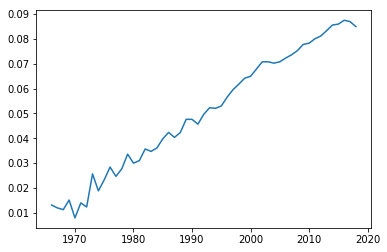

In [17]:
plt.plot(publs_lim_grouped["year"], publs_lim_grouped["fem_share"])

In [10]:
# Visualization
# visualize correlation matrix https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas
# annotated https://matplotlib.org/gallery/images_contours_and_fields/image_annotated_heatmap.html#sphx-glr-gallery-images-contours-and-fields-image-annotated-heatmap-py
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

autumn = cm.get_cmap('autumn', 10)

# draw a big matrix: https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
fig, ax = plt.subplots(figsize=(20, 10))
im = ax.imshow(publs_lim_cor, cmap=autumn)

plt.xticks(np.arange(len(publs_lim_cor.columns.values)), publs_lim_cor.columns.values, rotation='vertical')
plt.yticks(np.arange(len(publs_lim_cor.columns.values)), publs_lim_cor.columns.values)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

for i in range(len(publs_lim_cor.columns.values)):
    for j in range(len(publs_lim_cor.columns.values)):
        # round https://www.tutorialspoint.com/python/number_round.htm
        text = ax.text(j, i, round(publs_lim_cor.iloc[i, j], 2), ha="center", va="center", color="k")


plt.title("Correlation Matrix")

plt.show()

# We see that the year does not seem to correlate with the gender equality index even if 
# the years are taken out that have too few publications ("ratio"): The spearman coefficient is -0.04

TypeError: Invalid dimensions for image data

In [ ]:
# >>> Closer look at the distribution of the equality index
# Any publications
publs['ratio'].describe()

In [ ]:
publs_lim['ratio'].describe()

In [ ]:
# >>> Display development of ratio over time

In [ ]:
# How many publications by year?
valid_publs_by_year_group = publs_lim.groupby("year")
valid_publs_sum_by_year = valid_publs_by_year_group.count()

In [ ]:
from statistics import mode, pstdev
valid_ratio_mean_by_year = valid_publs_by_year_group.agg({'ratio':'mean'})
valid_ratio_median_by_year = valid_publs_by_year_group.agg({'ratio':'median'})
valid_ratio_std_by_year = valid_publs_by_year_group.agg({'ratio':pstdev})
#ratio_mode_by_year = valid_publs_by_year_group.agg({'ratio':mode})

In [ ]:
cmap = plt.get_cmap("tab20c")

In [ ]:
# Visualization
#https://matplotlib.org/gallery/api/two_scales.html

fig, ax1 = plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel('Equality Index')

ax1.plot(valid_ratio_median_by_year.index.values, valid_ratio_median_by_year['ratio'].values, color='g', label="Median Equality Index")
ax1.plot(valid_ratio_mean_by_year.index.values, valid_ratio_mean_by_year['ratio'].values, color='b', label="Mean Equality Index")
ax1.plot(valid_ratio_std_by_year.index.values, valid_ratio_std_by_year['ratio'].values, color='turquoise', label="Standard Deviation of Equality Index")

ax1.tick_params(axis='y')

# set y limits for a subplot: https://stackoverflow.com/questions/15858192/how-to-set-xlim-and-ylim-for-a-subplot-in-matplotlib
ax1.set_ylim([0,55])

plt.legend(loc="center left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Publications')  # we already handled the x-label with ax1
ax2.plot(valid_publs_sum_by_year.index.values, valid_publs_sum_by_year['key'].values, color='r', label="Amount of Publications")
ax2.tick_params(axis='y')

plt.title("Development of Equality Index vs. Amount of Publications")
plt.legend(loc="lower right")
plt.show()

In [ ]:
# How many authors by year?
valid_publs_authors_by_year = valid_publs_by_year_group.agg({'n_authors':'sum'})

In [ ]:
# How many female authors by year?
valid_publs_f_by_year = valid_publs_by_year_group.agg({'n_females':'sum'})

In [ ]:
# How many male authors by year?
valid_publs_m_by_year = valid_publs_by_year_group.agg({'n_males':'sum'})

In [ ]:
# How many unknown authors by year?
valid_publs_u_by_year = valid_publs_by_year_group.agg({'n_unknown':'sum'})

In [ ]:
#https://matplotlib.org/gallery/api/two_scales.html

fig, ax1 = plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel('Equality Index')

ax1.plot(valid_ratio_median_by_year.index.values, valid_ratio_median_by_year['ratio'].values, color='g', label="Median Equality Index")
ax1.plot(valid_ratio_mean_by_year.index.values, valid_ratio_mean_by_year['ratio'].values, color='b', label="Mean Equality Index")
ax1.plot(valid_ratio_std_by_year.index.values, valid_ratio_std_by_year['ratio'].values, color='turquoise', label="Standard Deviation of Equality Index")

ax1.tick_params(axis='y')

# set y limits for a subplot: https://stackoverflow.com/questions/15858192/how-to-set-xlim-and-ylim-for-a-subplot-in-matplotlib
ax1.set_ylim([0,55])

plt.legend(loc="center left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Authors')  # we already handled the x-label with ax1
ax2.plot(valid_publs_authors_by_year.index.values, valid_publs_authors_by_year['n_authors'].values, color='xkcd:orange', label="Amount of Authors")
ax2.plot(valid_publs_f_by_year.index.values, valid_publs_f_by_year['n_females'].values, color='xkcd:rose', label="Amount of Female Authors")
ax2.plot(valid_publs_m_by_year.index.values, valid_publs_m_by_year['n_males'].values, color='xkcd:peach', label="Amount of Male Authors")
ax2.plot(valid_publs_u_by_year.index.values, valid_publs_u_by_year['n_unknown'].values, color='xkcd:salmon', label="Amount of Authors of Unknown Gender")
ax2.tick_params(axis='y')

plt.title("Development of Equality Index vs. Amount of Authors")
plt.legend(loc="lower left")
plt.show()

In [ ]:
# >>> Evaluation
# The gender equality does not correlate with the year of the publication.
# It stagnates around the same value, looking at median and mean. The std also stays similar. 
# In other words: Yes, we see a slight improvement of the number of female authors, however, the total number of 
# authors also rises, thus the gender equality index does not improve.